In [41]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.sparse import coo_matrix, csr_matrix

plt.style.use("ggplot")

#### Load data

In [42]:
ratings = pd.read_csv(os.path.join("..", "..", "data", "yahoo", "ratings.csv"))

In [43]:
# nubmer of unique user Ids:
print("Number of unique users:", ratings.userId.nunique())

# nubmer of unique user Ids:
print("Number of unique items:", ratings.itemId.nunique())

Number of unique users: 1000990
Number of unique items: 624961


In [44]:
ratings.head()

,userId,itemId,rating,timestamp
0,0,507696,90,2006-07-08 07:34:00
1,0,137915,90,2006-07-08 07:39:00
2,0,22757,90,2006-07-17 11:20:00
3,0,120328,90,2006-07-17 11:20:00
4,0,123025,90,2006-07-17 11:20:00


In [45]:
# Check and clean NaN values
print("Number of ratings Null values: ", max(ratings.isnull().sum()))

ratings.dropna(inplace=True)

Number of ratings Null values:  0


### Users data

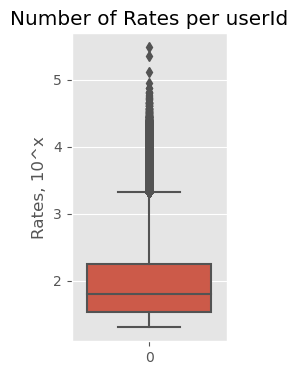

In [46]:
# Count the number of rows for each userId
# Plotting the boxplot
plt.figure(figsize=(2, 4))
sns.boxplot(data=np.log10(ratings.groupby("userId").size().values))
plt.ylabel("Rates, 10^x")
plt.title("Number of Rates per userId")
plt.show()

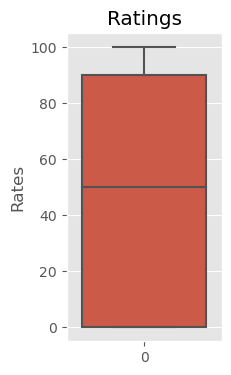

In [24]:
# Plotting the boxplot of rates distribution
plt.figure(figsize=(2, 4))
sns.boxplot(data=ratings.rating.values)
plt.ylabel("Rates")
plt.title("Ratings")
plt.show()

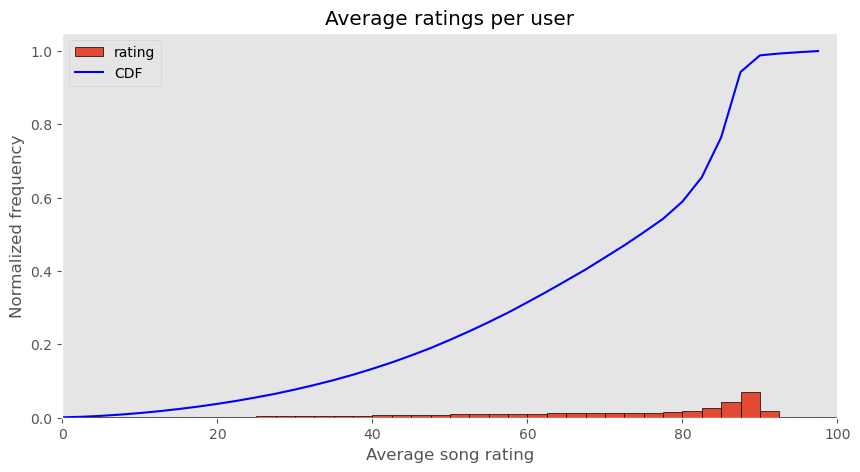

In [35]:
dftmp = ratings[["rating", "userId"]].groupby("userId").mean()
# Plot histogram
dftmp.plot(
    kind="hist", bins=40, grid=0, edgecolor="black", figsize=(10, 5), density=True
)
# Plot cumulative function on top (couldn't do any other way)
# evaluate the histogram
values, base = np.histogram(dftmp, bins=40, density=True)
# evaluate the cumulative (multiply by the average distance between points in the x-axis to get UNIT area)
cumulative = np.cumsum(values) * np.diff(base).mean()
# plot the cumulative function
plt.plot(base[:-1], cumulative, c="blue", label="CDF")
plt.xlim(0, 100)
plt.legend()
plt.xlabel("Average song rating")
plt.ylabel("Normalized frequency")
plt.title("Average ratings per user")
plt.show()

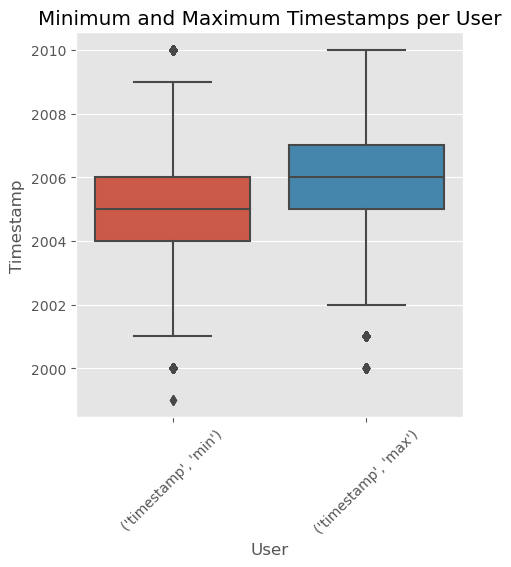

In [10]:
# Getting the minimum and maximum timestamps for each user
ratings['timestamp'] = pd.to_datetime(ratings["timestamp"])
user_timestamps = ratings.copy()
user_timestamps.timestamp = user_timestamps.timestamp.dt.year
user_timestamps = (
    user_timestamps[["timestamp", "userId"]].groupby("userId").agg(["min", "max"])
)

# Plotting the boxplots
plt.figure(figsize=(5, 5))
sns.boxplot(data=user_timestamps)
plt.xlabel("User")
plt.ylabel("Timestamp")
plt.title("Minimum and Maximum Timestamps per User")
plt.xticks(rotation=45)
plt.show()

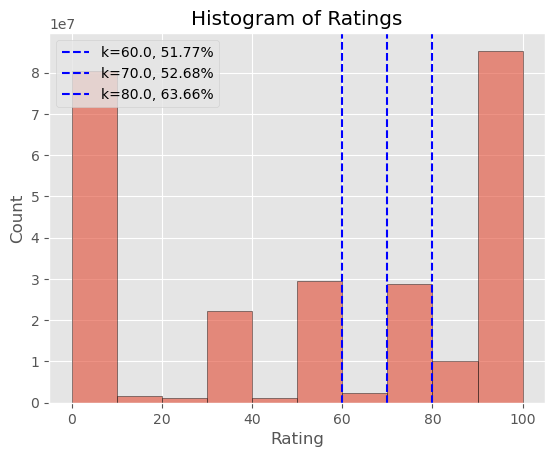

In [36]:
# Create a list of k values
k_values = [60.0, 70.0, 80.0]

# Plot the histogram
plt.hist(ratings["rating"], bins=10, edgecolor="black", alpha=0.6)

for k in k_values:
    # Count the number of ratings less than k
    num_ratings_less_than_k = len(ratings[ratings["rating"] < k])

    # Calculate the total number of ratings
    total_ratings = len(ratings)

    # Calculate the percentage
    percentage_less_than_k = (num_ratings_less_than_k / total_ratings) * 100

    # Plot the vertical line for k
    plt.axvline(
        x=k, color="blue", linestyle="--", label=f"k={k}, {percentage_less_than_k:.2f}%"
    )

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Histogram of Ratings")
plt.legend()
plt.show()

#### Lets make implicit dataset from explicit original one

In [37]:
# remove things < min_rating, and convert to implicit dataset
# by considering ratings as a binary preference only
min_rating = 70
ratings["rating"] = ratings["rating"].apply(lambda x: 0 if x < min_rating else 1)
ratings.reset_index(drop=True, inplace=True)

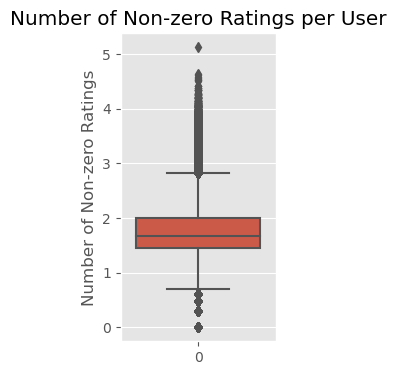

Median number of rates per movie: 47.00000000000001


In [38]:
# Filter the ratings DataFrame to include non-zero ratings
non_zero_ratings = ratings[ratings["rating"] != 0]

# Group by userId and calculate the count of non-zero ratings
user_rating_counts = non_zero_ratings.groupby("userId")["rating"].count()

# Create a boxplot
plt.figure(figsize=(2, 4))
sns.boxplot(data=np.log10(user_rating_counts).values)
plt.ylabel("Number of Non-zero Ratings")
plt.title("Number of Non-zero Ratings per User")
plt.show()

print("Median number of rates per movie:", 10 ** np.log10(user_rating_counts).median())

# Items

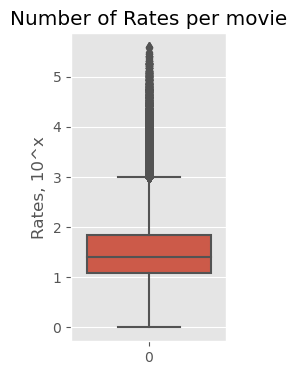

Median number of rates per item: 25.000000000000007


In [40]:
# Count the number of rows for each movieId
user_row_counts = ratings[ratings.rating != 0].groupby("itemId").size()
# Plotting the boxplot
plt.figure(figsize=(2, 4))
sns.boxplot(data=np.log10(user_row_counts).values)
plt.ylabel("Rates, 10^x")
plt.title("Number of Rates per movie")
plt.show()

print("Median number of rates per item:", 10 ** np.log10(user_row_counts).median())